In [ ]:
# 주가 데이터를 다운로드하기 위해 야후-파이낸스 라이브러리 설치
!pip install yfinance


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf


In [ ]:
name = 'GOOG'       # 종목명: 구글
start_day = '2021-01-01'
end_day = '2024-08-01'


In [ ]:
stock = yf.download(name, start=start_day, end=end_day)


/tmp/ipython-input-2624966132.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(name, start=start_day, end=end_day)
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(stock.shape)       # 작업 확인용 출력
stock.head()             # 작업 확인용 출력


(899, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.901382,87.512305,84.887906,87.357722,38038000
2021-01-05,86.531639,86.867146,85.393158,85.740345,22906000
2021-01-06,86.251808,86.883551,84.448024,84.628454,52042000
2021-01-07,88.834457,88.891613,86.339287,86.488895,45300000
2021-01-08,89.826553,89.957277,88.152756,88.870740,41012000


In [ ]:
stock2 = pd.DataFrame(stock['Close'])
stock2.head()        # 작업 확인용 출력


Ticker,GOOG
Date,
2021-01-04,85.901382
2021-01-05,86.531639
2021-01-06,86.251808
2021-01-07,88.834457
2021-01-08,89.826553


In [ ]:
stock2.to_csv('/content/drive/MyDrive/data/구글 주식 데이터 분석_딥러닝/'+name+'.csv')


In [ ]:
stock2.reset_index()
stock_values = stock2.values
print(stock_values[0])  # 작업 확인용 출력


[85.90138245]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_values_scaled = scaler.fit_transform(stock_values)

stock_values_scaled[0]  # 작업 확인용 출력


array([0.02671193])

In [ ]:
n_train = int(len(stock_values) * 0.8)   # 학습용 데이터 개수
n_test = len(stock_values) - n_train     # 평가용 데이터 개수

print(n_train, n_test)                   # 작업 확인용 출력


719 180


In [ ]:
X_train, Y_train = [], []

# 20일 구간의 주가를 x값으로 하고, 그다음 날 값을 y값으로 정리
for i in range(20, n_train):
    X_train.append(stock_values_scaled[i-20:i, 0])
    Y_train.append(stock_values_scaled[i, 0])

X_train[0]  # 작업 확인용 출력


array([0.02671193, 0.03250777, 0.02993445, 0.0536845 , 0.06280782,
       0.04430054, 0.0350811 , 0.03866929, 0.03216953, 0.03034586,
       0.05533459, 0.09923284, 0.10122117, 0.10570053, 0.10494638,
       0.11310079, 0.07358586, 0.08835881, 0.07584845, 0.10583762])

In [ ]:
X_train1, Y_train1 = np.array(X_train), np.array(Y_train)

X_train2 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))  # (샘플 수, 타임스텝, 특성 수)

print(X_train2.shape)   # 작업 확인용 출력
X_train2[0]             # 작업 확인용 출력


(699, 20, 1)


array([[0.02671193],
       [0.03250777],
       [0.02993445],
       [0.0536845 ],
       [0.06280782],
       [0.04430054],
       [0.0350811 ],
       [0.03866929],
       [0.03216953],
       [0.03034586],
       [0.05533459],
       [0.09923284],
       [0.10122117],
       [0.10570053],
       [0.10494638],
       [0.11310079],
       [0.07358586],
       [0.08835881],
       [0.07584845],
       [0.10583762]])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
lstm_stock = Sequential()

lstm_stock.add(LSTM(units=20, return_sequences=True, input_shape=(X_train2.shape[1], 1)))
lstm_stock.add(LSTM(units=20, return_sequences=False))
lstm_stock.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 학습 매개변수 설정
lstm_stock.compile(loss='mean_squared_error', optimizer='adam')

# 학습 수행
lstm_stock.fit(X_train2, Y_train1, epochs=10, batch_size=1, verbose=2)
#epochs의 숫자가 커질수록 정확도가 높아진다, 단 일정 수를 넘으면 오히려 효율이 떨어짐! 실행 속도가 느려지기 때문

Epoch 1/10
699/699 - 5s - 8ms/step - loss: 0.0062
Epoch 2/10
699/699 - 5s - 6ms/step - loss: 0.0021
Epoch 3/10
699/699 - 4s - 5ms/step - loss: 0.0015
Epoch 4/10
699/699 - 5s - 8ms/step - loss: 0.0013
Epoch 5/10
699/699 - 4s - 6ms/step - loss: 0.0011
Epoch 6/10
699/699 - 4s - 5ms/step - loss: 9.0718e-04
Epoch 7/10
699/699 - 6s - 8ms/step - loss: 8.1661e-04
Epoch 8/10
699/699 - 4s - 6ms/step - loss: 7.0031e-04
Epoch 9/10
699/699 - 4s - 5ms/step - loss: 6.6558e-04
Epoch 10/10
699/699 - 6s - 9ms/step - loss: 6.1392e-04


In [ ]:
stock_test = stock_values_scaled[n_train-20:]  # 테스트 시작 20일 전부터 가져옴
X_test = []

for i in range(20, len(stock_test)):
    X_test.append(stock_test[i-20:i, 0])

X_test[0]  # 작업 확인용 출력


array([0.50361454, 0.52107496, 0.52564588, 0.51001368, 0.50727099,
       0.48679369, 0.49739794, 0.51769241, 0.39473716, 0.36520964,
       0.36484397, 0.38632681, 0.38221312, 0.40296468, 0.41219766,
       0.42856135, 0.43843425, 0.44711893, 0.45498078, 0.44062858])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)   # 작업 확인용 출력
print(X_test[0])      # 작업 확인용 출력


(180, 20, 1)
[[0.50361454]
 [0.52107496]
 [0.52564588]
 [0.51001368]
 [0.50727099]
 [0.48679369]
 [0.49739794]
 [0.51769241]
 [0.39473716]
 [0.36520964]
 [0.36484397]
 [0.38632681]
 [0.38221312]
 [0.40296468]
 [0.41219766]
 [0.42856135]
 [0.43843425]
 [0.44711893]
 [0.45498078]
 [0.44062858]]


In [ ]:
predicted_value = lstm_stock.predict(X_test)

predicted_value[0]  # 작업 확인용 출력


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([0.4503393], dtype=float32)

In [ ]:
predicted_value = scaler.inverse_transform(predicted_value)
print(predicted_value[0])  # 작업 확인용 출력


[131.96783]


In [ ]:
stock_train_vis = stock[:n_train]                    # 학습 구간 데이터
stock_test_vis = stock[n_train:]                     # 테스트 구간 데이터
stock_test_vis['Predictions'] = predicted_value      # 예측 결과 추가


/tmp/ipython-input-791048507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_vis['Predictions'] = predicted_value      # 예측 결과 추가


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

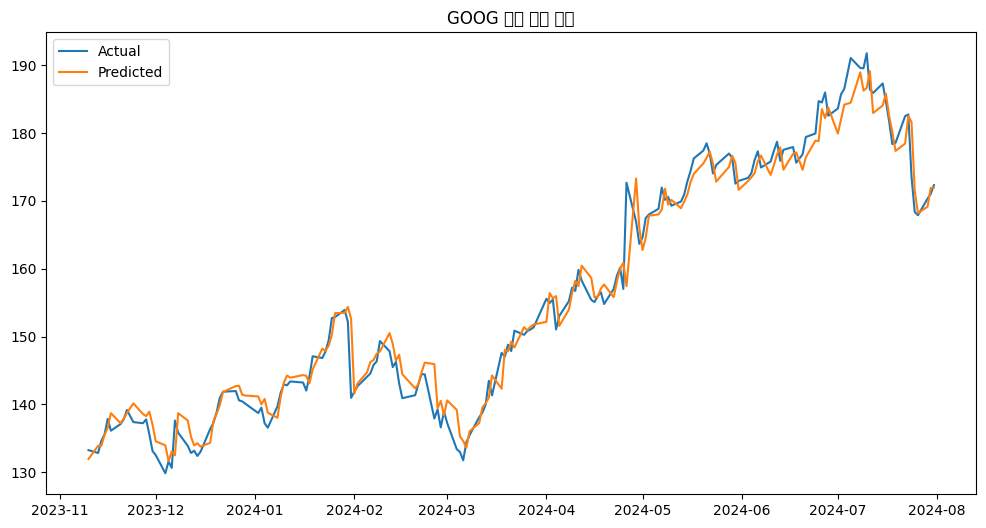

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_test_vis['Close'], label='Actual')
plt.plot(stock_test_vis['Predictions'], label='Predicted')
plt.legend()
plt.title('GOOG 주가 예측 결과')
plt.show()

Text(0.5, 1.0, 'GOOG (2021-01-01 ~ 2024-08-01)')

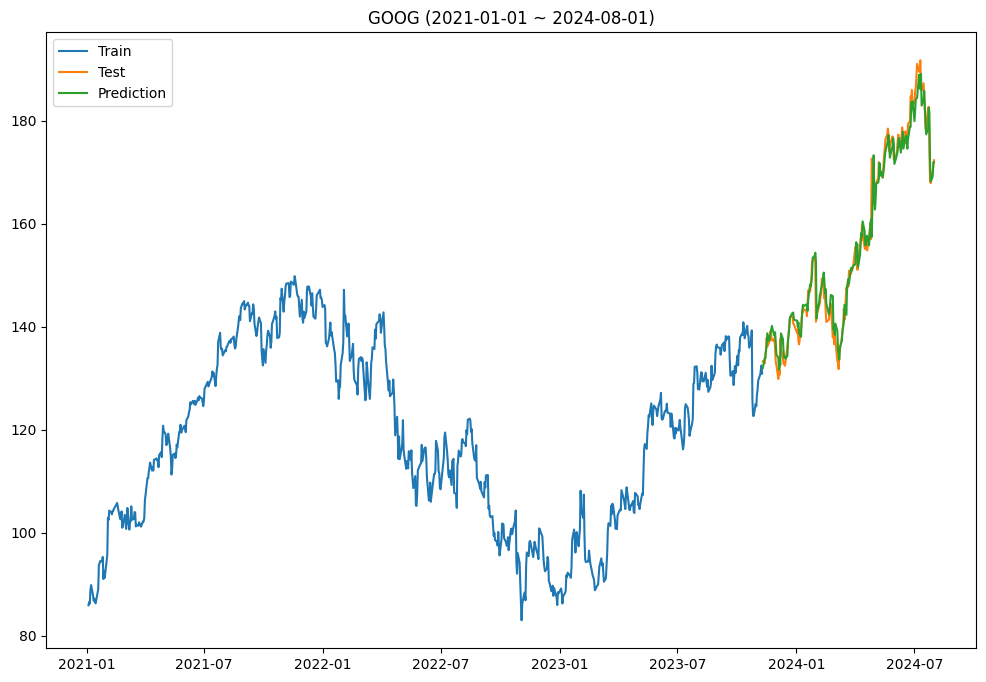

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.plot(stock_train_vis['Close'], label='Train')           # 학습 데이터 실제값
plt.plot(stock_test_vis['Close'], label='Test')             # 테스트 데이터 실제값
plt.plot(stock_test_vis['Predictions'], label='Prediction') # 테스트 데이터 예측값

plt.legend()
plt.title(name + ' (' + start_day + ' ~ ' + end_day + ')')


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
stock = pd.read_csv('/content/drive/MyDrive/data/구글 주식 데이터 분석_딥러닝/GOOG.csv')


In [ ]:
stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    899 non-null    object 
 1   GOOG    899 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.2+ KB


In [ ]:
stock.head()


,Date,GOOG
0,2021-01-04,85.901382
1,2021-01-05,86.531639
2,2021-01-06,86.251808
3,2021-01-07,88.834457
4,2021-01-08,89.826553


In [ ]:
stock.columns = ['ds', 'y']


In [ ]:
stock.head()  # 작업 확인용 출력


,ds,y
0,2021-01-04,85.901382
1,2021-01-05,86.531639
2,2021-01-06,86.251808
3,2021-01-07,88.834457
4,2021-01-08,89.826553


In [ ]:
from prophet import Prophet
Pp_stock = Prophet()
Pp_stock.fit(stock)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6way1au2/m0u3wz7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6way1au2/tb4h_96i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50405', 'data', 'file=/tmp/tmp6way1au2/m0u3wz7r.json', 'init=/tmp/tmp6way1au2/tb4h_96i.json', 'output', 'file=/tmp/tmp6way1au2/prophet_modelc9r8howd/prophet_model-20250807223627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_ds = Pp_stock.make_future_dataframe(periods=100)
future_ds.tail()  # 작업 확인용 출력


,ds
994,2024-11-04
995,2024-11-05
996,2024-11-06
997,2024-11-07
998,2024-11-08


In [ ]:
future_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      999 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [ ]:
future_y = Pp_stock.predict(future_ds)

# 작업 확인용 출력
future_y[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
994,2024-11-04,195.038332,187.734544,202.683418
995,2024-11-05,195.194595,188.139630,202.630791
996,2024-11-06,195.446401,188.400751,202.953117
997,2024-11-07,195.801029,188.598377,203.269954
998,2024-11-08,196.239442,189.176301,204.021082


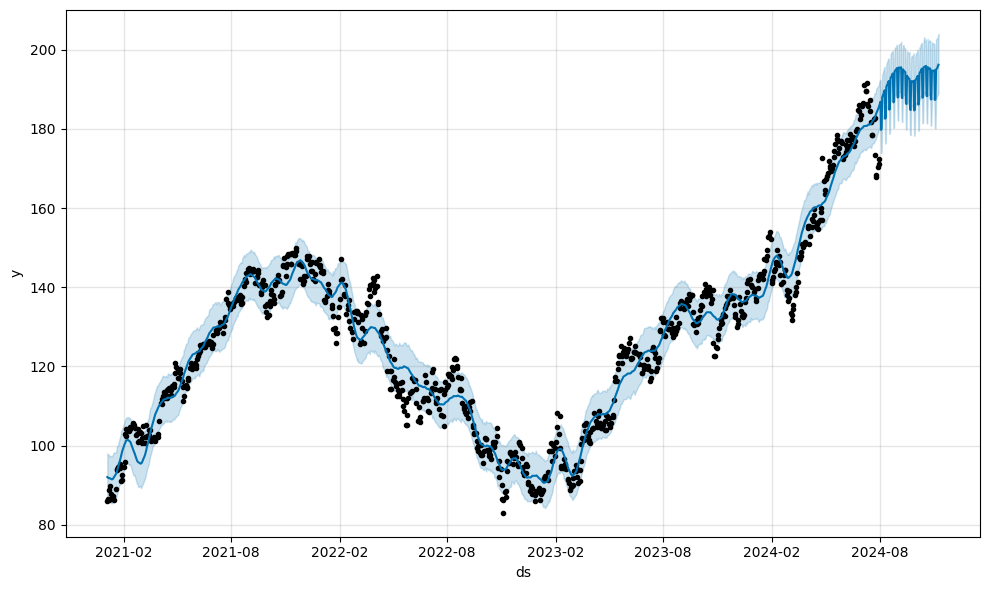

In [ ]:
fig_trend = Pp_stock.plot(future_y)


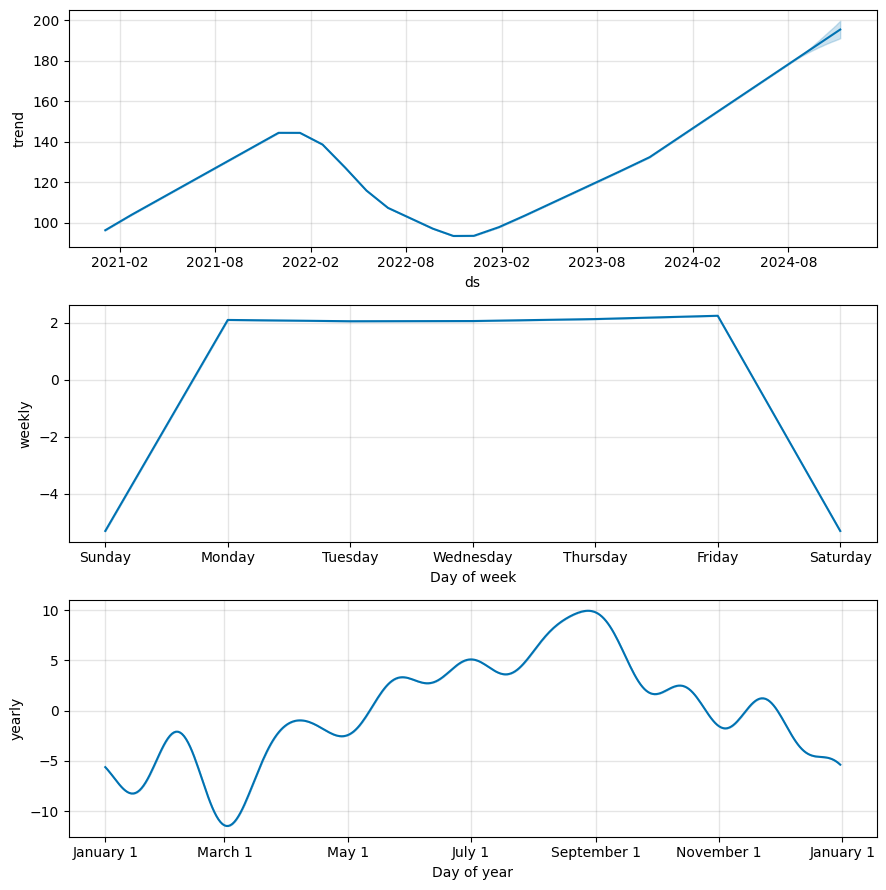

In [ ]:
fig_components = Pp_stock.plot_components(future_y)


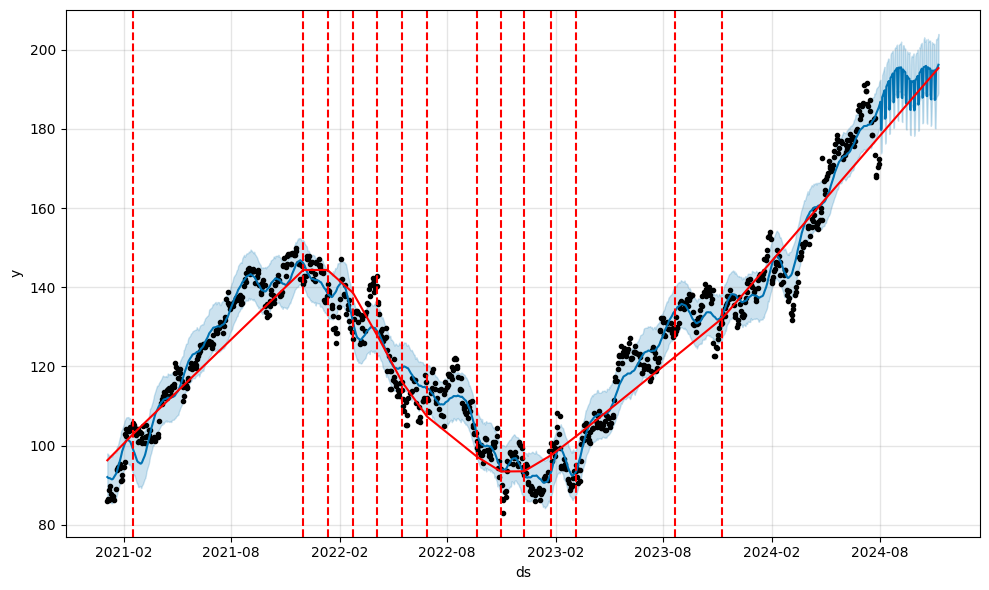

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig_trend = Pp_stock.plot(future_y)

fig_trend_changepoints = add_changepoints_to_plot(
    fig_trend.gca(),  # 현재 그래프 축 가져오기
    Pp_stock,         # Prophet 모델
    future_y          # 예측 결과 DataFrame
)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(Pp_stock, future_y)


In [ ]:
plot_components_plotly(Pp_stock, future_y)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

